# eBay Camera Auction

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [13]:
cam = pd.read_csv('camera_named.csv')
cam.head(5)

,bid_id,item_id,product,model,buy_it_now,seller,reserve_price,seller_feedback,bidder,bid_price,buyer_feedback,X12,X13,X14,bid_time,start_time,end_time
0,150866,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,HP C 200,252.0,damckee,10.0,32,bluej8,252.0,1,False,False,True,2005-04-07T16:51:38Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
1,150867,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,HP C 200,252.0,damckee,10.0,32,vlfields,249.5,1,False,False,True,2005-04-07T15:16:22Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
2,150868,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,HP C 200,252.0,damckee,10.0,32,tsboise@aol.com,245.0,1,False,False,True,2005-04-07T14:10:09Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
3,150869,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,HP C 200,252.0,damckee,10.0,32,acm1546,225.0,1,False,False,True,2005-04-06T18:10:12Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
4,150870,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,HP C 200,252.0,damckee,10.0,32,golf2671@aol.com,217.0,1,False,False,True,2005-04-06T19:48:37Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z


## Data Features

In [14]:
cam['model'].unique()

array(['HP C 200', 'Olympus C 2020', 'Fuji MX 1200', 'Agfa  Smile',
       'Coolpix 800', 'Coolpix 950', 'Agfa 1680', 'Fuji DX 10',
       'Epson 750', 'Olympus D 450', 'CoolPix 990', 'Polaroid PDC 640',
       'Olympus D 400', 'Olympus D 360L', 'Epson 800', 'Sony FD73',
       'Sony FD88', 'Olympus D 340R', 'Sony FD91', 'Sony FD83',
       'Kodak DC290', 'Kodak DC260', 'Canon S 10', 'Olympus D 620L',
       'Olympus C 2500L', 'Coolpix 900', 'Kodak DC280', 'Fuji MX 2700',
       'Toshiba PDR M5', 'Toshiba PDR M4', 'Mustek VDC 3500', 'Canon A 5',
       'Canon A 50', 'Mustek MDC 800', 'Panasonic PV SD 4090',
       'Kodak DC200', 'Kodak DC200 Plus', 'Mustek 350', 'Olympus C 2000',
       'Fuji MX 2900 Zoom', 'Kodak DC240', 'Mustek VDC 300',
       'Coolpix 700', 'Minolta  V', 'Kodak DC220', 'Kodak DC265',
       'Agfa 1280', 'Kodak DC215', 'Epson 650', 'Umax AstraCam',
       'Olympus D 320L', 'Epson 700', 'Kodak DC215 Millennium',
       'Kodak DC50', 'Casio QV 780', 'Sony FD71', 'Fuji

In [15]:
cam.columns

Index(['bid_id', 'item_id', 'product', 'model', 'buy_it_now', 'seller',
       'reserve_price', 'seller_feedback', 'bidder', 'bid_price',
       'buyer_feedback', 'X12', 'X13', 'X14', 'bid_time', 'start_time',
       'end_time'],
      dtype='object')

## Looking at the model 'HP C 200' Only

In [16]:
HPC = cam[cam['model']=='HP C 200']

In [17]:
HPC['item_id'].unique()

array([295255148, 300274320, 300283104, 300851516, 307397634])

In [18]:
HPC[HPC['item_id']==295255148]['bid_price'].max()

252.0

In [19]:
HPC[HPC['item_id']==300274320]['bid_price'].max()

235.16

In [20]:
HPC[HPC['item_id']==300283104]['bid_price'].max()

231.09

In [21]:
HPC[HPC['item_id']==300851516]['bid_price'].max()

232.5

In [22]:
HPC[HPC['item_id']==307397634]['bid_price'].max()

223.5

# Start of Answers

## Definition of a perfect substitute
Two goods are viewed as identical and the prices of the products have no influence on whether or not it is a perfect substitute.

##  "Part of the project is to come up with a method of grouping auctions so that they seem to be perfect substitutes."

An auction is a perfect substitute of each other if it is selling the exact same product based on my definition above of what a perfect substitue is. If the previous assumption is made, then the groupings of the auction will be based on the attribute "model" column of the table. This is because if an two auctions are selling the exact same products they are viewed as identical as prices do not factor into the definition of a perfect substitute.

Grouping the dataset by "model." This creates a pandas object "grouped." Below, I show the first 5 entries of the grouped dataset

In [23]:
grpCams = cam.groupby('model')
grpCams.first().head(5)

,bid_id,item_id,product,buy_it_now,seller,reserve_price,seller_feedback,bidder,bid_price,buyer_feedback,X12,X13,X14,bid_time,start_time,end_time
model,,,,,,,,,,,,,,,,
Agfa 780,185410,324463435,New! Agfa ePhoto 780C Digital Camera 780-C (it...,180.00,dutypaid,85.00,16,mmorris608@aol.com,180.00,1,False,False,True,2005-05-06T20:22:47Z,2005-05-03T20:31:42Z,2005-05-06T20:31:42Z
Agfa Smile,149986,296276580,AGFA SMILE DIGITAL CAMERA 640X480 brand new!! ...,74.00,balisz,9.99,19,bargainboy00,74.00,1,True,False,False,2005-04-08T19:30:24Z,2005-03-29T18:31:22Z,2005-04-08T19:31:22Z
Agfa 1280,158915,307055523,AGFA 1680 LE 1280 WIDE ANGLE MACRO LENS NEW (i...,89.99,agelman@msn.com,89.99,1,rrodrigu@rush.edu,89.99,1,True,False,False,2005-04-18T18:45:16Z,2005-04-12T07:26:28Z,2005-04-19T07:26:28Z
Agfa 1680,149730,296952834,NEW Agfa 1680 LE Digital Camera L/R VISA/MC (i...,330.00,roddoa,199.99,6,pamtiques2000,330.00,1,False,False,True,2005-04-09T06:26:17Z,2005-03-30T16:17:31Z,2005-04-09T17:17:31Z
Canon A 5,150490,301056452,CANON NB-5H BATTERY FOR A-50 S-10 A-5 - NEW (i...,61.00,green45,20.00,12,mermer1957@aol.com,61.00,1,True,False,False,2005-04-11T18:31:56Z,2005-04-04T18:38:24Z,2005-04-11T18:38:24Z


##  "Estimate the distribution of buyer valuations for this group of auctions(part of the project is to figure out what that means)"

For this part of the question, I am unsure if the objective is to estimate the distribution of buyer valuations for a single group or multiple groups of auctions. Based on my previous assumption in which the dataset is supposed grouped by the "model" attribute, this would result in multiple groups meaning there would be multiple estimates for the distribution of buyer valuations. If my assumption was wrong then the answer below could be flawed.

### Mini Data Exploration

In [24]:
HPC = grpCams.get_group('HP C 200')
display(HPC.head(5))
filterHPC = HPC.groupby('item_id').max()
filterHPC['bid_price']

,bid_id,item_id,product,buy_it_now,seller,reserve_price,seller_feedback,bidder,bid_price,buyer_feedback,X12,X13,X14,bid_time,start_time,end_time
0,150866,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,252.0,damckee,10.0,32,bluej8,252.0,1,False,False,True,2005-04-07T16:51:38Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
1,150867,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,252.0,damckee,10.0,32,vlfields,249.5,1,False,False,True,2005-04-07T15:16:22Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
2,150868,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,252.0,damckee,10.0,32,tsboise@aol.com,245.0,1,False,False,True,2005-04-07T14:10:09Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
3,150869,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,252.0,damckee,10.0,32,acm1546,225.0,1,False,False,True,2005-04-06T18:10:12Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z
4,150870,295255148,NEW~~HP C-200 Digital Camera w/LCD -- CHEAP! (...,252.0,damckee,10.0,32,golf2671@aol.com,217.0,1,False,False,True,2005-04-06T19:48:37Z,2005-03-28T15:53:25Z,2005-04-07T16:53:25Z


item_id
295255148    252.00
300274320    235.16
300283104    231.09
300851516    232.50
307397634    223.50
Name: bid_price, dtype: float64

Text(0.5, 1.0, 'Number of bidders vs Price')

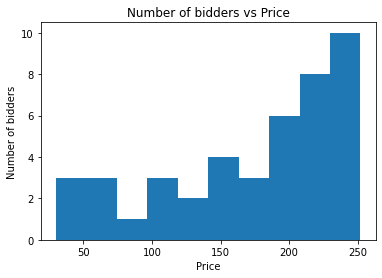

In [25]:
plt.hist(HPC['bid_price'])
plt.ylabel("Number of bidders")
plt.xlabel("Price")
plt.title("Number of bidders vs Price")

### Defining Buyer Valuation

Since [this text file](https://github.com/michaelpetersubc/notebooks/blob/master/eBay/buy_it_now_mechanism.txt) tells us that ebay auctions are second-price auctions, buyer valuation should be the same as what we learned in class. Bidders should bid their value, $b = v$. Hence to find the distribution of bidder's valuations, we just look at the distribution of bids. However, unlike what we did in class, in these auctions, bidders can bid for an item multiple times. They have multiple opportunties to place a bid. We will assume that an individual's highest bid for a certain item is what corresponds to their valuation of that item

Showing valuations of bidders

In [26]:
HPC = grpCams.get_group('HP C 200')
uniqueBidders = HPC.groupby('bidder')
highestBidPerBidder = uniqueBidders['bid_price'].max().values
print(highestBidPerBidder)
valuation = highestBidPerBidder

[ 30.   210.   225.   235.16 230.5  232.66 252.   231.09 150.    60.
 232.5  100.   175.   162.5  220.   217.   175.5  200.   100.   140.
 221.   200.   210.   150.    65.    50.   111.   207.12 180.5  230.
  62.   245.   223.5  249.5 ]


### Estimating distribution of buyers valuations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


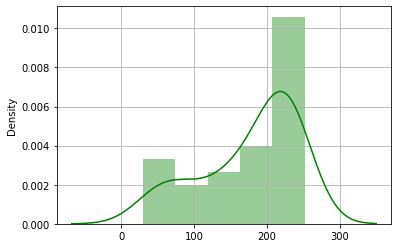

In [27]:
sns.distplot(valuation, color="g")
plt.grid()
plt.show()

In [28]:
import scipy

In [29]:
mean,var = scipy.stats.distributions.norm.fit(valuation)
x = np.linspace(25,260,500)
fitted_data = scipy.stats.distributions.norm.pdf(x, mean, var)

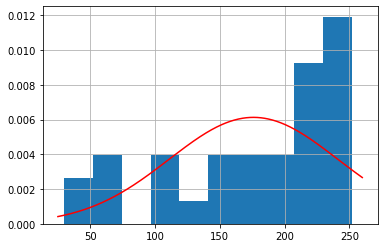

In [30]:
plt.hist(valuation, density=True)
plt.grid("on")
plt.plot(x,fitted_data,'r-')

## "From your estimate of the distribution of valuations, you can estimate the ’optimal’ reserve price for that collection of auctions assuming that sellers have 0 cost."

### The Optimal Reserve Price

The formula for the optimal reserve price is as follows: $r = \frac{1-F(r)}{f(r)}$. Where $F(r)$ is the CDF of the bidders' values. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.cumsum is deprecated and will be removed in SciPy 2.0.0, use numpy.cumsum instead
  """Entry point for launching an IPython kernel.


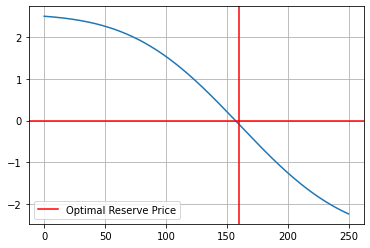

In [71]:
norm_cdf = scipy.cumsum(fitted_data)
norm_pdf = scipy.stats.norm.pdf(fitted_data)
optimal = (1-norm_cdf)/norm_pdf
x = np.linspace(0,250,500)
plt.plot(x,optimal)
plt.grid("on")
plt.axvline(x=160,color="r",label = "Optimal Reserve Price")
plt.axhline(y=0,color="r")
plt.legend()

### Conclusion

In conclusion, it appears that the optimal reserve price should be around 160 dollars within auctions that are selling the HP C 200 model camera.

## "Compare your estimate of the optimal reserve price with the distribution of reserve prices in the data - do the reserves prices the sellers actually set look optimal? "

### Reserve price set by the Seller

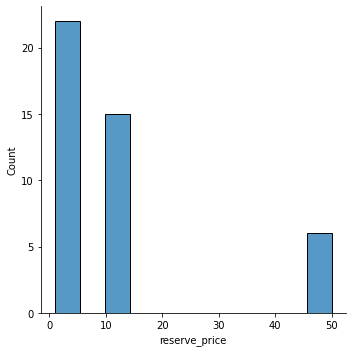

In [62]:
HPC[['reserve_price']]
sns.displot(HPC['reserve_price'])

In [63]:
from scipy.stats import mode

In [64]:
print("Mean: ", HPC['reserve_price'].mean())
print("Median: ", HPC['reserve_price'].median())

Mean:  11.428837209302326
Median:  2.5


### Answer

Comparing the reserve price set by the sellers and the optimal reserve price calculated, I noticed a drastic difference in prices. The reserve price set by the seller much lower than the optimal reserve price calculated. In conclusion, the reserve price set by the sellers is clearly not optimal.

### Potential Gains by the Seller

In [65]:
filterHPC = HPC.groupby('item_id').max()
filterHPC['bid_price'].mean()

234.85